### Quantum Error Correction in the context of Topological Quantum Codes, such as the Surface Code

Quantum Error Correction (QEC) is a fundamental aspect of fault-tolerant quantum computing, ensuring that quantum information is preserved despite potential errors during computation. The Surface Code is a topological quantum code that leverages a 2D grid of qubits to encode logical qubits and detect errors via stabilizer measurements. This method is highly fault-tolerant, making it a promising candidate for future quantum computers.

Superconducting qubits stand at the forefront of quantum computing research due to their significant advantages and promising applications. These qubits leverage the principles of superconductivity, where electrical current can flow without resistance, to create quantum states that are both highly stable and easily manipulated. Unlike traditional qubits, superconducting qubits are fabricated using microfabrication techniques similar to those used in classical integrated circuits, making them more scalable for large-scale quantum computing.

Superconducting qubits have shown great potential in quantum error correction, which is essential for building fault-tolerant quantum computers. Their coherence times, although still limited, have improved significantly over the years, enabling more complex quantum computations. Furthermore, superconducting qubits are at the heart of various quantum algorithms, including those for quantum chemistry, material science, and optimization problems, where classical computers struggle.

One of the key advantages of superconducting qubits is their strong coupling to microwave photons, which allows for precise control over their quantum states. This characteristic makes them ideal for implementing quantum gates, a fundamental operation in quantum computing. The ability to perform high-fidelity quantum gates with superconducting qubits has been a major driving force behind their adoption in both academic and industrial quantum research. 

The implementation below demonstrates how the Surface Code can protect quantum information, a crucial step towards building reliable quantum computers capable of complex computations. In the provided code, we simulate the Surface Code using Qiskit. We begin by initializing a quantum circuit with 9 qubits and 3 ancilla qubits, representing the physical qubits that make up the logical qubit. The circuit starts by creating a random initial state, simulating the encoding process. Hadamard gates are applied to prepare the qubits for error detection.

Next, we perform stabilizer measurements, which involve applying controlled-NOT (CNOT) gates between the qubits to detect any errors. These measurements are key to identifying errors without disturbing the quantum information. After performing a final round of Hadamard gates, the ancilla qubits are measured to determine if any errors occurred.

The simulator then runs the compiled circuit, and the resulting statevector is used to plot a Bloch sphere, providing a visual representation of the qubit states. Additionally, the measurement outcomes are visualized using a histogram, illustrating the success of the error correction process..

Looking to the future, the development of superconducting qubits continues to push the boundaries of quantum computing. Researchers are focusing on increasing the coherence times and gate fidelities, as well as developing more efficient error-correction codes to mitigate the effects of quantum noise. Additionally, the integration of superconducting qubits with other quantum technologies, such as photonic qubits, is being explored to create hybrid quantum systems that could offer even greater computational power and versatility 



In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector, random_statevector
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Initialize AerSimulator
simulator = AerSimulator()

In [3]:
# Create a quantum circuit for the Surface Code with 9 qubits and 3 ancilla qubits
qc = QuantumCircuit(9, 3)

In [4]:
# Create a random initial state to simulate encoding a logical qubit
initial_state = random_statevector(2)
qc.initialize(initial_state, 0)

In [5]:
# Apply Hadamard gates to prepare for error detection
for qubit in range(1, 9):
    qc.h(qubit)

In [6]:
# Measure stabilizers to detect errors
qc.cx(1, 0)
qc.cx(4, 0)
qc.cx(2, 1)
qc.cx(5, 1)
qc.cx(4, 3)
qc.cx(7, 3)
qc.cx(5, 4)
qc.cx(8, 4)
qc.cx(7, 6)
qc.cx(0, 6)
qc.cx(8, 7)
qc.cx(1, 7)

In [7]:
# Perform a final round of Hadamard gates for error correction
for qubit in range(1, 9):
    qc.h(qubit)

In [8]:
# Measure the ancilla qubits to detect any errors
qc.measure([0, 1, 2], [0, 1, 2])

In [9]:
# **Save the statevector at the end of the circuit**
qc.save_statevector()

In [10]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

Quantum Circuit before compilation:


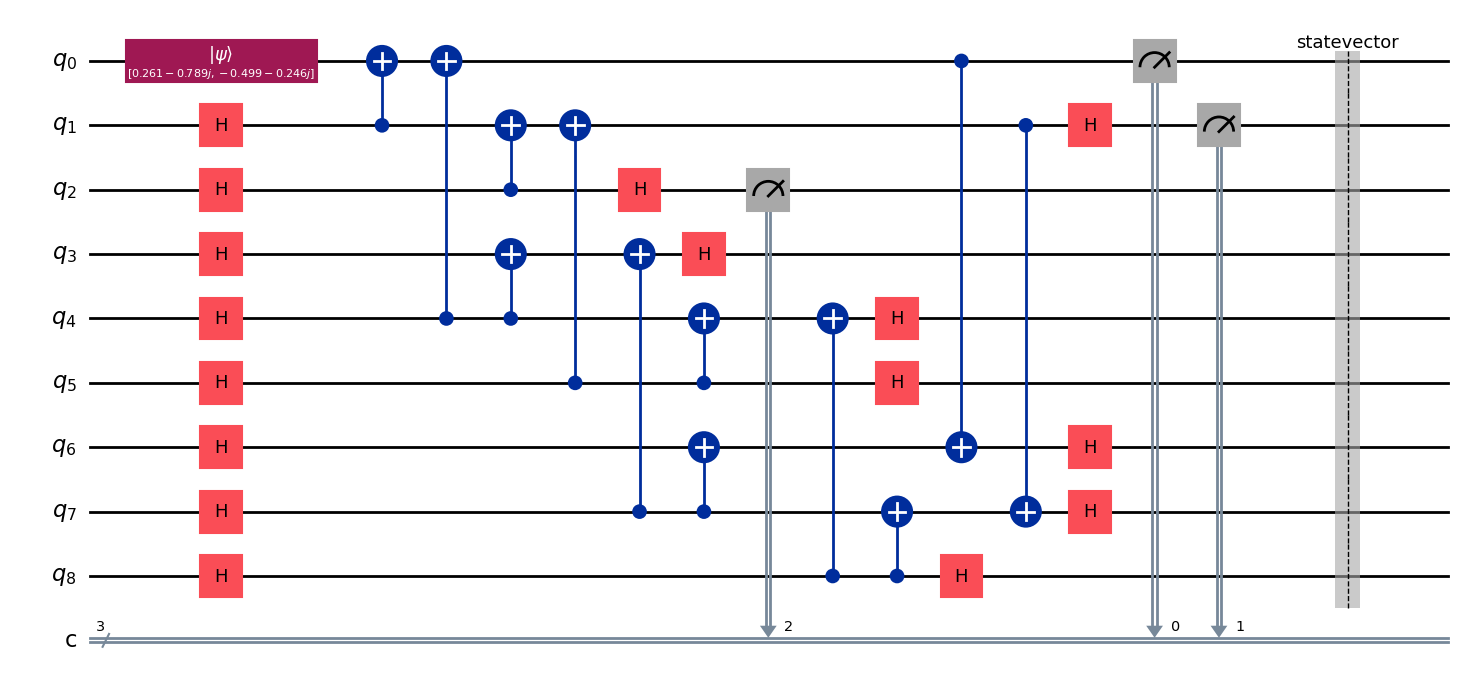

In [11]:
# Draw the quantum circuit before compilation
print("Quantum Circuit before compilation:")
qc.draw('mpl')
plt.show()


Quantum Circuit after compilation:


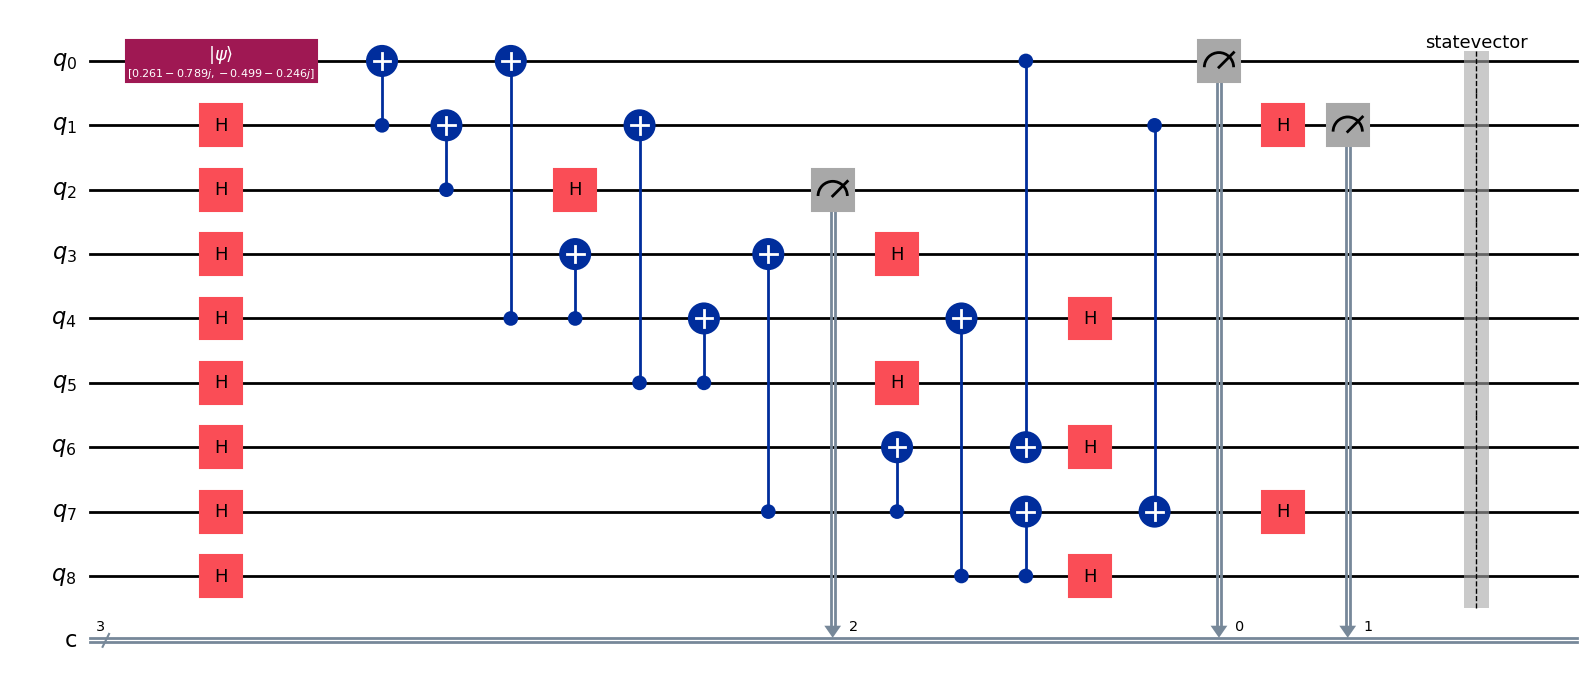

In [12]:
# Draw the quantum circuit after compilation
print("\nQuantum Circuit after compilation:")
compiled_circuit.draw('mpl')
plt.show()

In [13]:
# Execute the circuit
result = simulator.run(compiled_circuit).result()

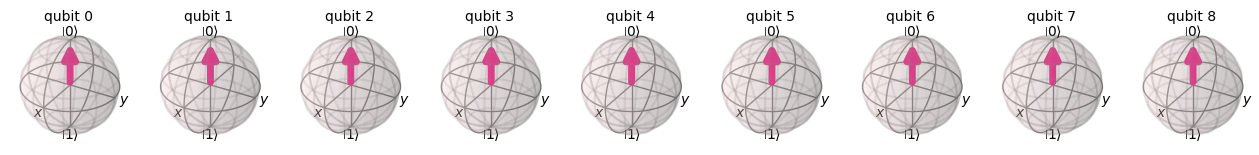

In [14]:
# Extract the statevector and plot the Bloch sphere
statevector = Statevector(result.get_statevector()) 
plot_bloch_multivector(statevector)
plt.show()

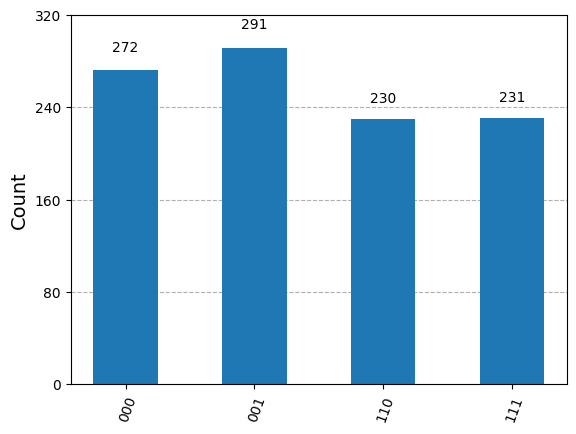

In [15]:
# Extract counts and plot histogram to observe the measurement outcomes
counts = result.get_counts()
plot_histogram(counts)
plt.show()